In [2]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("Students_data.csv")
X_features = df.iloc[:,-5: -1].columns
X_train = df[X_features]
y = df['y']


# Model Normalization

In [4]:
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
mean_y = np.mean(y)
std_y = np.std(y)

X_train_norm = (X_train - mean_X) / std_X
y_train_norm = (y - mean_y) / std_y

TypeError: Could not convert ['ABCDEFGHIHHJKELEMBNOINBFFPPFQRJBCQDNPSPKBBUGBVTHBZSABEJAOEUIWPXKNEKPMRKMYXEZVXTPXXUWSUXXEOEMNYAAJCAAPABMATSK'
 'AAAAABABBBBBBBABBABBBBBBBABBBABBABAABABBBBAABAABABBBBBBAABBBABBBABBBBABBBAABAABBABBAABBBBABBBBBBBBBBBBBBB'
 'AAAAACACAAAADAAAAAABAADACDAASAABABAAAAAAAAAAAADCAAAADAAAAAAAABDDAAAASAAADAAAAADAADAAAAASSAAAASAASAAAAAAAA'] to numeric

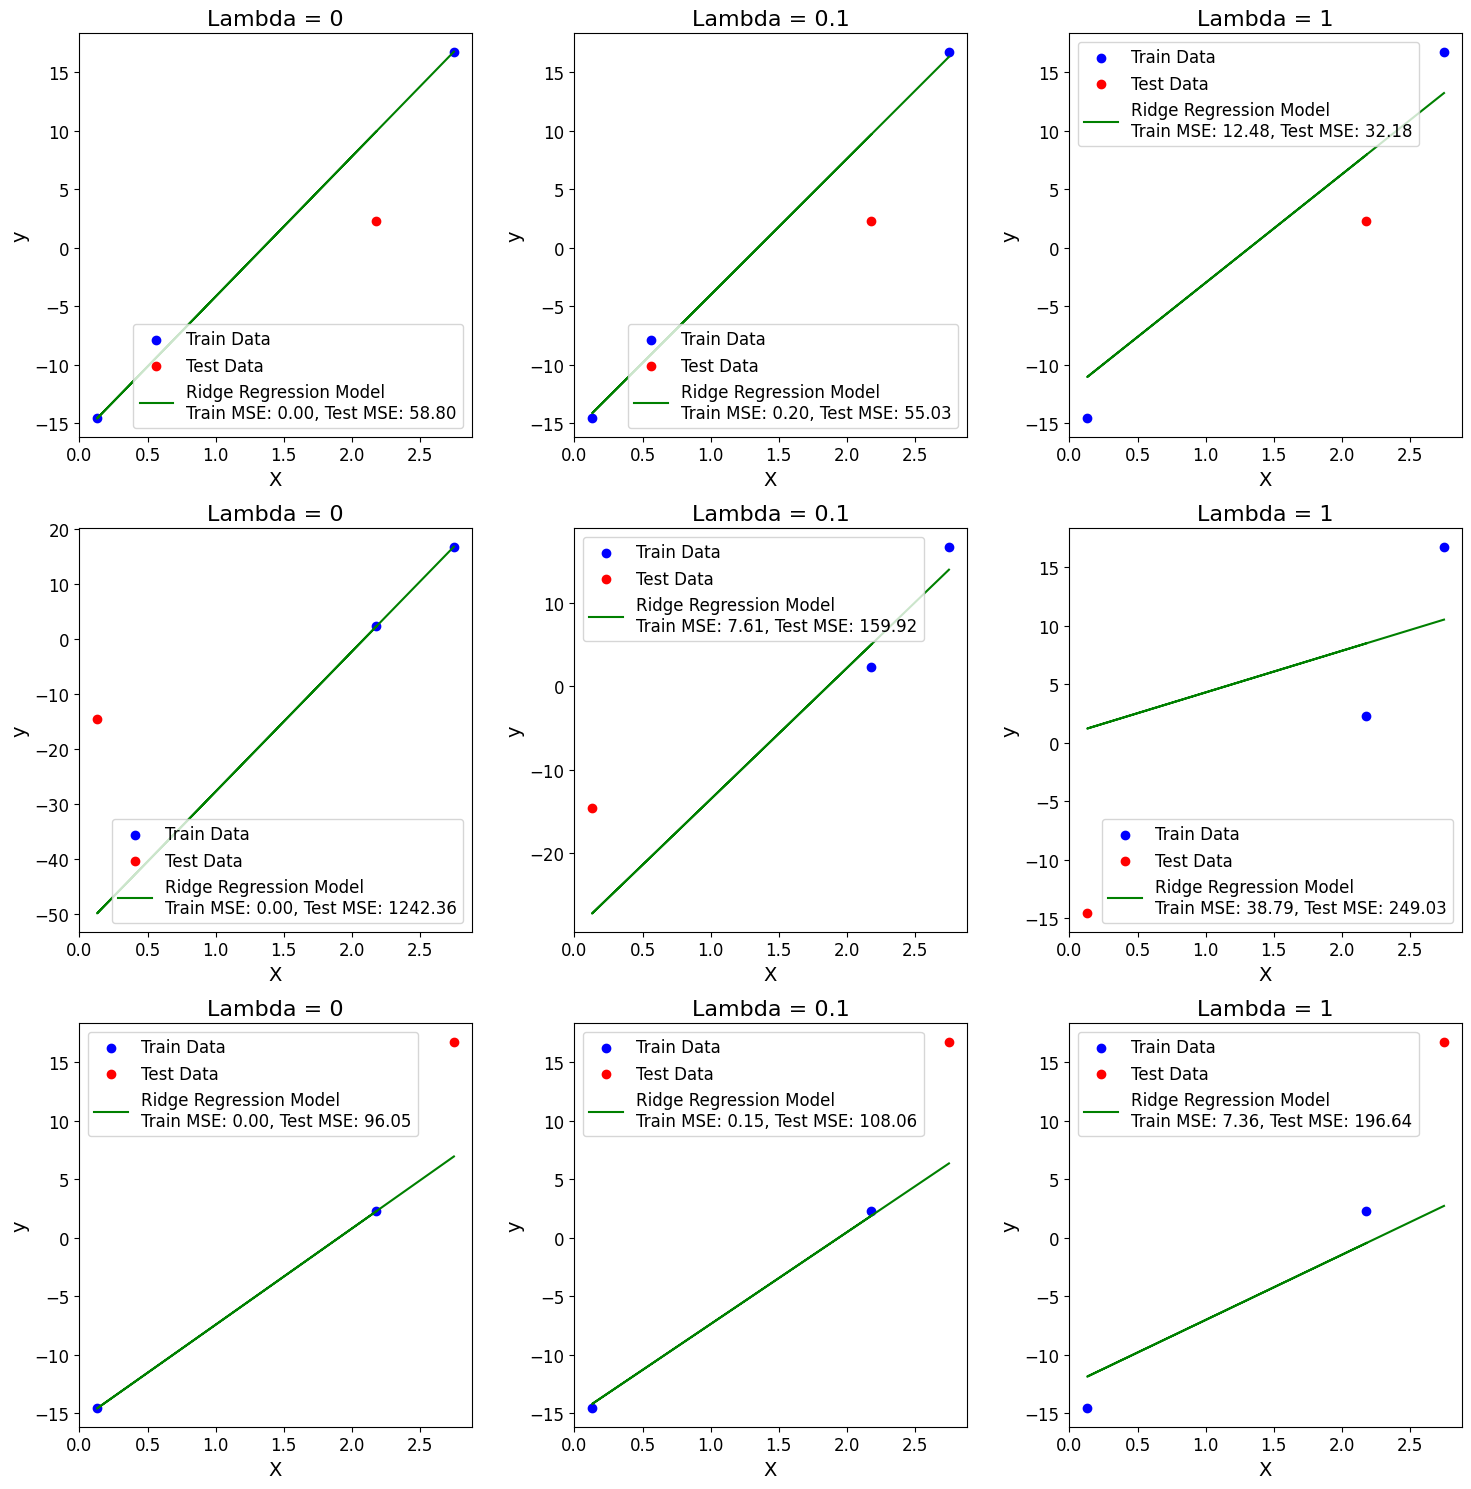

Lambda = 0: Average Train MSE = 0.00, Average Test MSE = 465.74
Lambda = 0.1: Average Train MSE = 2.65, Average Test MSE = 107.67
Lambda = 1: Average Train MSE = 19.54, Average Test MSE = 159.28


In [ ]:


# Data points
X = np.array([[2.18], [0.13], [2.75]])
y = np.array([2.26, -14.57, 16.74])

# Define regularization parameters
alphas = [0, 0.1, 1]
n_alphas = len(alphas)

# Initialize subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
avg_test_mse = np.zeros(n_alphas)
avg_train_mse = np.zeros(n_alphas)

for i, alpha in enumerate(alphas):
    # Initialize KFold
    kf = KFold(n_splits=3, random_state=None)
    total_test_mse = 0
    total_train_mse = 0
    
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        # Split data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Ridge regression model
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)

        # Train and test MSE
        train_mse = np.mean((ridge.predict(X_train) - y_train) ** 2)
        test_mse = np.mean((ridge.predict(X_test) - y_test) ** 2)
        total_train_mse += train_mse
        total_test_mse += test_mse

        # Plotting
        ax = axs[j, i]  # switching i and j indices
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='red', label='Test Data')
        ax.plot(X, ridge.predict(X), color='green', label=f'Ridge Regression Model\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
        ax.set_title(f"Lambda = {alpha}", fontsize=16)
        ax.set_xlabel('X', fontsize=14)
        ax.set_ylabel('y', fontsize=14)
        ax.legend(fontsize=12)

        # Increase tick font size
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Compute average train and test MSE for the current lambda
    avg_train_mse[i] = total_train_mse / kf.get_n_splits()
    avg_test_mse[i] = total_test_mse / kf.get_n_splits()

plt.tight_layout()
plt.show()

# Display average train and test MSE for each lambda
for i, alpha in enumerate(alphas):
    print(f"Lambda = {alpha}: Average Train MSE = {avg_train_mse[i]:.2f}, Average Test MSE = {avg_test_mse[i]:.2f}")
